In [1]:
import numpy as np
import pandas as pd

Рассмотрим данные испытаний со смесями газов

In [2]:
df_gases_2 = pd.read_pickle("./data_gases_2.pkl")

Для начала удалим все "дифузные значения", так как они являются выбросами для своих таргетных значений C и будут лишь мешать при дальнейшей работе.

In [3]:
df_gases_2_grouped = df_gases_2.groupby('percentage')

Выбросы будем классифицировать по стандартному правилу - значения лежащие за краями статистически значимой выборки (Разность первого квартиля и полутора межквартильных расстояний; сумма третьего квартиля и полутора межквартильных расстояний)

In [4]:
quar_1 = df_gases_2_grouped['C'].quantile(0.25)
quar_3 = df_gases_2_grouped['C'].quantile(0.75)

In [5]:
inter_quar = {perc: (quar_3.get(perc) - quar_1.get(perc)) for perc in quar_1.keys()} 

In [6]:
left_right_border = {perc: (quar_1.get(perc) - 1.5*inter_quar.get(perc),
                            quar_3.get(perc) + 1.5*inter_quar.get(perc)) for perc in quar_1.keys()}
left_right_border

{0.0: (-421.48619375, 236.90281225),
 0.05: (-69.30927062500004, 395.39784237500004),
 0.2: (1766.759673, 2560.9786689999996),
 2.0: (18357.55517575, 20532.86376975),
 3.0: (27708.114991124996, 30067.038818125002),
 5.0: (46522.332030749996, 52588.660156750004)}

In [7]:
df_gases_2

,t,C,Um,Ur,Ud,percentage
0,65,5.984166,0.70175,0.70086,0.77665,0.0
1,70,-14.744394,0.70181,0.70086,0.77667,0.0
2,75,-224.305252,0.70211,0.70073,0.77665,0.0
3,80,-49.504810,0.70185,0.70082,0.77666,0.0
4,85,-143.622314,0.70192,0.70067,0.77662,0.0
...,...,...,...,...,...,...
2294,11535,-124.971397,0.69357,0.68850,0.77439,0.0
2295,11540,-223.308426,0.69363,0.68834,0.77440,0.0
2296,11545,-370.392334,0.69373,0.68813,0.77444,0.0
2297,11550,-305.286804,0.69384,0.68844,0.77446,0.0


In [8]:
for perc in left_right_border.keys():
    df_gases_2.drop(df_gases_2[(df_gases_2['percentage'] == perc) &
                               ((df_gases_2['C'] < left_right_border.get(perc)[0]) |
                                (df_gases_2['C'] > left_right_border.get(perc)[1]))].index, inplace=True) 

In [9]:
df_gases_2

,t,C,Um,Ur,Ud,percentage
0,65,5.984166,0.70175,0.70086,0.77665,0.0
1,70,-14.744394,0.70181,0.70086,0.77667,0.0
2,75,-224.305252,0.70211,0.70073,0.77665,0.0
3,80,-49.504810,0.70185,0.70082,0.77666,0.0
4,85,-143.622314,0.70192,0.70067,0.77662,0.0
...,...,...,...,...,...,...
2294,11535,-124.971397,0.69357,0.68850,0.77439,0.0
2295,11540,-223.308426,0.69363,0.68834,0.77440,0.0
2296,11545,-370.392334,0.69373,0.68813,0.77444,0.0
2297,11550,-305.286804,0.69384,0.68844,0.77446,0.0


In [22]:
df_gases_1 = pd.read_pickle("./data_gases_1.pkl")
df_gases_1.dropna(inplace=True)
df_gases_1_grouped = df_gases_1.groupby('percentage')
quar_1 = df_gases_1_grouped['C'].quantile(0.25)
quar_3 = df_gases_1_grouped['C'].quantile(0.75)
inter_quar = {perc: (quar_3.get(perc) - quar_1.get(perc)) for perc in quar_1.keys()} 
left_right_border = {perc: (quar_1.get(perc) - 1.5*inter_quar.get(perc),
                            quar_3.get(perc) + 1.5*inter_quar.get(perc)) for perc in quar_1.keys()}
for perc in left_right_border.keys():
    df_gases_1.drop(df_gases_1[(df_gases_1['percentage'] == perc) &
                               ((df_gases_1['C'] < left_right_border.get(perc)[0]) |
                                (df_gases_1['C'] > left_right_border.get(perc)[1]))].index, inplace=True) 
df_gases_1

,t,C,Um,Ur,Ud,percentage
0,1592,84.065575,0.70109,0.70087,0.77666,0.0
1,1597,-202.939117,0.70105,0.70094,0.77664,0.0
2,1602,-208.769150,0.70101,0.70099,0.77669,0.0
3,1607,-284.524109,0.70081,0.70080,0.77653,0.0
4,1612,45.755302,0.70090,0.70072,0.77648,0.0
...,...,...,...,...,...,...
1007,6627,203.236938,0.68365,0.68473,0.77429,0.5
1008,6632,-384.684357,0.68357,0.68479,0.77428,0.5
1009,6637,241.526825,0.68397,0.68449,0.77419,0.5
1010,6642,275.324738,0.68347,0.68457,0.77424,0.5


Добавим целевые метки значения С в наши dataframe-ы

In [27]:
df_stitch_1 = pd.read_pickle("./data_stitch_1.pkl")
df_stitch_2 = pd.read_pickle("./data_stitch_2.pkl")
df_stitch_1['C_target'] = 0.
df_stitch_2['C_target'] = 0.

In [30]:
df_stitch_1.drop(columns=['temperature'])
df_stitch_2.drop(columns=['temperature'])

,t,Um,Ur,Ud,C_target
0,108,0.70172,0.70287,0.77656,0.0
1,113,0.70175,0.70305,0.77649,0.0
2,118,0.70177,0.70299,0.77649,0.0
3,123,0.70173,0.70329,0.77649,0.0
4,128,0.70214,0.70309,0.77651,0.0
...,...,...,...,...,...
14444,72284,0.70094,0.70127,0.77651,0.0
14445,72289,0.70106,0.70140,0.77649,0.0
14446,72294,0.70090,0.70133,0.77656,0.0
14447,72299,0.70130,0.70127,0.77654,0.0


In [31]:
df_gases_1['C_target'] = df_gases_1['percentage']*10000
df_gases_2['C_target'] = df_gases_2['percentage']*10000

In [38]:
df_gases_1.loc[df_gases_1['percentage'] == 0.2]

,t,C,Um,Ur,Ud,percentage,C_target
582,4502,-453.892792,0.69426,0.69189,0.77514,0.2,2000.0
583,4507,-237.530197,0.69394,0.69180,0.77513,0.2,2000.0
584,4512,453.462555,0.69412,0.69178,0.77506,0.2,2000.0
585,4517,-379.696960,0.69412,0.69180,0.77516,0.2,2000.0
586,4522,147.432358,0.69408,0.69175,0.77511,0.2,2000.0
...,...,...,...,...,...,...,...
883,6007,-388.513733,0.68749,0.68629,0.77432,0.2,2000.0
884,6012,389.912964,0.68751,0.68628,0.77442,0.2,2000.0
885,6017,-362.876404,0.68734,0.68648,0.77441,0.2,2000.0
886,6022,349.569458,0.68758,0.68645,0.77440,0.2,2000.0


df_gases_1 будем использовать как тестовую выборку, так как его показатели С абсолютно не соответсвуют таргету и вообще являются случайными.

In [39]:
df_stitch_1.to_pickle(f"./data_stitch_1.pkl")
df_stitch_2.to_pickle(f"./data_stitch_2.pkl")
df_gases_1.to_pickle(f"./data_gases_1_filtered.pkl")
df_gases_2.to_pickle(f"./data_gases_2_filtered.pkl")

Далее ненужные вычисления (из-за ошибочного предположения)

In [10]:
# zero_perc = df_gases_2.loc[df_gases_2['percentage'] == 0.0]
# zero_perc

,t,C,Um,Ur,Ud,percentage
0,65,5.984166,0.70175,0.70086,0.77665,0.0
1,70,-14.744394,0.70181,0.70086,0.77667,0.0
2,75,-224.305252,0.70211,0.70073,0.77665,0.0
3,80,-49.504810,0.70185,0.70082,0.77666,0.0
4,85,-143.622314,0.70192,0.70067,0.77662,0.0
...,...,...,...,...,...,...
2294,11535,-124.971397,0.69357,0.68850,0.77439,0.0
2295,11540,-223.308426,0.69363,0.68834,0.77440,0.0
2296,11545,-370.392334,0.69373,0.68813,0.77444,0.0
2297,11550,-305.286804,0.69384,0.68844,0.77446,0.0


In [11]:
# zero_perc.describe()

,t,C,Um,Ur,Ud,percentage
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.0
mean,4124.645127,-110.472104,0.696840,0.693339,0.775264,0.0
std,3985.195803,119.465875,0.002306,0.003528,0.000607,0.0
min,65.000000,-418.312286,0.691850,0.686990,0.774200,0.0
25%,1333.750000,-185.449272,0.696450,0.692847,0.775097,0.0
50%,2512.500000,-107.936333,0.697590,0.694390,0.775380,0.0
75%,3691.250000,-33.764821,0.698120,0.695290,0.775660,0.0
max,11555.000000,233.150726,0.702110,0.700860,0.776670,0.0


In [12]:
from scipy import stats

In [13]:
# k2, p = stats.normaltest(zero_perc['C'].to_numpy())
# print(p)

0.5117262800024963


In [18]:
# norm = stats.norm.rvs(loc=-110.47,scale=119.47,size=zero_perc['C'].to_numpy().size,random_state=28041990)

In [15]:
import seaborn as sns

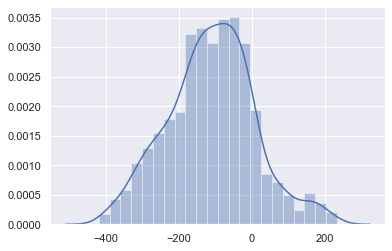

In [16]:
# sns.set()
# ax = sns.distplot(zero_perc['C'].to_numpy())

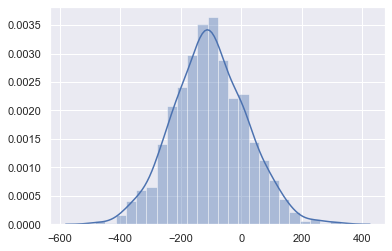

In [19]:
# ax = sns.distplot(norm)

In [20]:
# stats.chisquare(f_obs=zero_perc['C'].to_numpy(), f_exp=norm)

Power_divergenceResult(statistic=-313514.0227272345, pvalue=1.0)